In [1]:
import io
import matplotlib

from matplotlib import pyplot as plt
import numpy as np
import sys

import os.path
import sys
#file_dir = os.path.dirname(__file__)
#sys.path.append(file_dir)
#sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
#sys.path.append('../')
#print(sys.path)
import time
import math
import random
import matplotlib
import numpy as np
##import ioLAMMPS
##import netgen
##from relax import Optimizer
from numpy import linalg as LA
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import param as p
import shutil
import networkx as nx



def meanr2_fun(n_chains, chains, links, Lx, Ly, Lz):
    meanr2=0
    dist = np.zeros((n_chains,4))
    dist[:,0:3] = chains[:,1:]
    dist[:,3] = -1
        
    for i in range (0, n_chains):
        if(chains[i,2] !=-1):
      
          link_1 = chains[i,2]-1
          link_2 = chains[i,3]-1
          lk = links[link_1,:] - links[link_2,:]
          
          lk[0] = lk[0] - int(round(lk[0]/Lx))*Lx
          lk[1] = lk[1] - int(round(lk[1]/Ly))*Ly
          lk[2] = lk[2] - int(round(lk[2]/Lz))*Lz
                
          dist[i,3] = LA.norm(lk)
          meanr2=meanr2+(dist[i,3])**2
##          print(dist[i,3])
##          stop
##          print(((dist[i,3])**2)/(p.N_low*p.b_low**2))
          

    return meanr2

def readLAMMPS_after_netgen(filename, vflag,G, folder):

   f1=open(filename,"r")

   line1 = f1.readline()
   line2 = f1.readline()

   line3 = f1.readline()
   line3 = line3.strip()
   n_links = int(line3.split(" ")[0])
 
   line4 = f1.readline()
   line4 = line4.strip()
   atom_types = int(line4.split(" ")[0])

   line5 = f1.readline()
   line5 = line5.strip()
   n_chains = int(line5.split(" ")[0])

   line6 = f1.readline()\
           
   line6 = line6.strip()
   bond_types = int(line6.split(" ")[0])

   links_unsort  = np.zeros((n_links,4))
   links   = np.zeros((n_links,3), dtype = float)
   chains  = np.full((n_chains,4), -1, dtype = int)
   mass    = np.zeros(atom_types, dtype = float)

   line7 = f1.readline()
   line8 = f1.readline()
   line8 = line8.strip()
   xlo = float(line8.split(" ")[0])
   xhi = float(line8.split(" ")[1])

   line9 = f1.readline()
   line9 = line9.strip()
   ylo = float(line9.split(" ")[0])
   yhi = float(line9.split(" ")[1])

   line10 = f1.readline()
   line10 = line10.strip()
   zlo = float(line10.split(" ")[0])
   zhi = float(line10.split(" ")[1])


   for i in range (0, 3):
       f1.readline()
   
   for i in range(0, atom_types):
       line = f1.readline()
       line = line.strip()
       mass[i] = float(line.split(" ")[1])

   f1.close()


   links_unsort = np.genfromtxt(filename, usecols=(0,3,4,5), skip_header=18, max_rows=n_links)

   for i in range(0, n_links):
       index = int(links_unsort[i,0])
       links[index-1,:] = links_unsort[i,1:4]


##   chains[:,0] = N
#cnt,ctype,1,conn1,conn2
   if(vflag==0):
      chains[:,0:4] = np.genfromtxt(filename,usecols=(0,1,2,3), skip_header=17+n_links+3, max_rows=n_chains)
   elif(vflag==1):
      chains[:,0:4] = np.genfromtxt(filename,usecols=(0,1,2,3), skip_header=17+2*n_links+2*3, max_rows=n_chains)
   else:
      print("Invalid Velocity Flag")
##   print(chains)

   for c in chains:
      [lnk_1,lnk_2]=c[2:4]
      G.add_edge(lnk_1,lnk_2)
##   directory = './'+str(int(100*frac_weak))+'/'
   filename = 'primary_loops'
##   file_path = os.path.join(directory, filename)
##   if not os.path.isdir(directory):
##      os.mkdir(directory)  
   loop_atoms = np.genfromtxt(folder+"0/"+filename , usecols=(1), skip_header=0)
   loop_atoms.tolist() 

   return xlo, xhi, ylo, yhi, zlo, zhi, n_links, n_chains, links, chains, atom_types, bond_types, mass, loop_atoms,G


L 51.746804735448904
C_mM 0.11984188583311728


6.179999536203205
6.369999690802136
7.179999536203204
6.529999922700535
6.14999961350267
6.609999072406409
7.299999227005341
6.160000231898397
6.7300006956951925
6.309999845401068


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


area 12.59101469906835 2.2069609514532518
gamma 0.2753656852367162 0.007646886832452691
modulus_theory 245.28217751447195 6.811469816431027
modulus_tensile 260.26392126571676 9.311686508178461


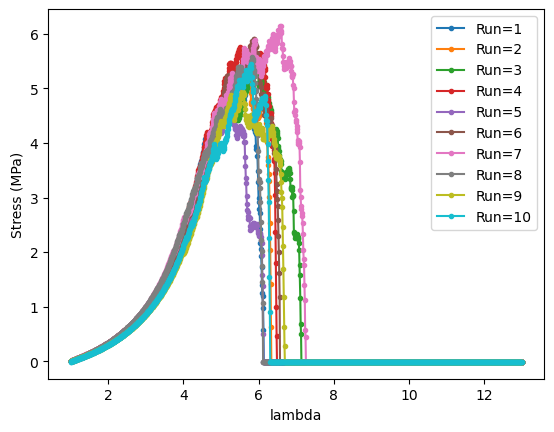

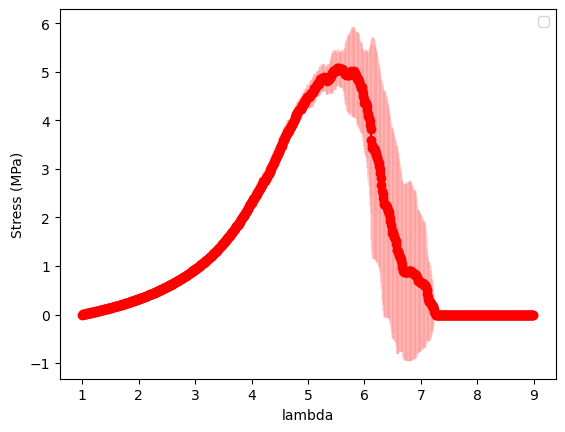

In [2]:
run_list=[1,2,3,4,5,6,7,8,9,10]
area_list=[]
stress_list=[]
gamma_list=[]

modulus_theory_list=[]
modulus_tensile_list=[]

max_extension_list=[]
max_stress_list=[]

len_stress=800
stress_all=np.zeros((len(run_list),len_stress))
lambda_list=np.zeros(len_stress)

run_cnt=-1
for run in run_list:
    run_cnt=run_cnt+1
    folder="./Run"+str(run)+"/"
    temps = []
    with io.open(folder+"0/"+"stress", mode="r") as f:
        next(f)
        for line in f:
            temps.append(line.split())

    Lx=[float(i[0]) for i in temps]
    Ly=[float(i[1]) for i in temps]
    Lz=[float(i[2]) for i in temps]

    lam=[i[3] for i in temps]
    lam=[float(i) for i in lam]


    FE=[i[4] for i in temps]
    FE=[float(i) for i in FE] #free energy stored in chain
    deltaFE=[i[5] for i in temps]
    deltaFE=[float(i) for i in deltaFE]

    st0=[i[6] for i in temps]
    st0=[float(i) for i in st0]
    st1=[i[7] for i in temps]
    st1=[float(i) for i in st1]
    st2=[i[8] for i in temps]
    st2=[float(i) for i in st2]
    st3=[i[9] for i in temps]
    st3=[float(i) for i in st3]
    st4=[i[10] for i in temps]
    st4=[float(i) for i in st4]
    st5=[i[11] for i in temps]
    st5=[float(i) for i in st5]
    factor=4.11
    st0=np.array(st0)*factor
    st1=np.array(st1)*factor
    st2=np.array(st2)*factor
    st3=np.array(st3)*factor
    st4=np.array(st4)*factor
    st5=np.array(st5)*factor
    ##st6=np.array(st6)

    ##stop


    ##size=sys.getsizeof(st1)
    ##factor=np.zeros((1,size))
    ##mylist = list(xrange(10))
    ##factor=np.zeros((1,size))
    ##a=st1+st2;
    ##a=[0.5*i for i in a]
    stress=st0-0.5*(st1+st2)
    stress_list.append(np.array(stress))
    
    xaxis=[(x)/Lx[0] for x in Lx]
    
    idx=np.where(-stress<=0.0001)[0]
    print(xaxis[idx[4]])
    max_extension_list.append(xaxis[idx[4]])
    max_stress_list.append(np.max(-stress))
    
    '''
    plt.plot(lam,st0,label='pxx')
    plt.plot(lam,st1,label='pyy')
    plt.plot(lam,st2,label='pzz')
    plt.plot(lam,st3,label='pxy')
    plt.plot(lam,st4,label='pyz')
    plt.plot(lam,st5,label='pzx')

    plt.xlabel('lambda')
    plt.ylabel('pressure/stress components')
    plt.legend()

    plt.figure()
    plt.plot(lam,deltaFE,label='deltaFE')
    plt.xlabel('lambda')
    plt.ylabel('delta Free Energy')
    plt.legend()
    '''
    #print(lam)
    #print(deltaFE)

    #plt.figure()
    
    plt.plot(xaxis,-stress,'.-',label='Run='+str(run))
    plt.xlabel('lambda')
    plt.ylabel('Stress (MPa)')
    plt.legend()
    ##plt.show()
    ##stop

    file1=open(folder+"data.txt","w")
    for i in range(len(xaxis)):
        file1.write("{:7} {:7} \n".format(xaxis[i],-stress[i]))
    file1.close()

    plt.savefig(folder+"stress_lambda_x.png")
    
    stress_all[run_cnt,:]=-stress[0:len_stress]
    lam_list=xaxis[0:len_stress]

    area=np.trapz(-stress, xaxis,0.001)
    file2=open(folder+"area.txt","w")
    file2.write(str(area))
    file2.close()
    area_list.append(area)
    
    cnt=10
    z = np.polyfit(xaxis[0:cnt], -stress[0:cnt], 1)
    ##plt.figure(2)
    ##plt.plot(np.array(xaxis[0:cnt]),z[1]+z[0]*np.array(xaxis[0:cnt]),'r-' )
    plt.savefig(folder+"stress_lambda_x_with_fit.png")
    modulus_tensile_list.append(z[0]*1000)

    #print('z=',z)
    #print('Modulus (kPa) (from tensile test) = ', z[0]*1000)
    #plt.show()
    parameters=np.zeros([2,6]) # N, b, K, fit_param, E_b,U0

    frac_weak_array_py=[0.0]#,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    ##frac_weak_array_py=frac_weak_array_py[my_task_id-1:len(frac_weak_array_py):num_tasks]      

    for frac_weak in frac_weak_array_py:


       netgen_flag = 0
       swell = 0
       if(netgen_flag==0):

          vflag = 0
       ##   N = 12   
    ##      print('--------------------------')   
    ##      print('----Reading Network-------')   
    ##      print('--------------------------')

          filename = "restart_network_0.txt"
    ##      file_path = os.path.join(directory, filename)
    ##      if not os.path.isdir(directory):
    ##         os.mkdir(directory)
          G=nx.Graph()
          [xlo, xhi, ylo, yhi, zlo, zhi, n_atoms, n_bonds, atoms, bonds, 
                  atom_types, bond_types, mass, loop_atoms,G] = readLAMMPS_after_netgen(folder+"0/"+filename, vflag, G,folder)


          mean_r2=meanr2_fun(n_bonds, bonds, atoms, (xhi-xlo), (yhi-ylo), (zhi-zlo))
          gamma=mean_r2/(p.n_chains*p.N_low*p.b_low**2)
          gamma_list.append(gamma)
          #print('gamma',gamma)
          G=p.conc*(10000/6.022)*gamma*8.314*298  #0.05*6.022*1.38*gamma*300
         # print('G',G)
          E=3*G
          #print('E (kPa) (from gamma analysis)',0.001*E)

          modulus_theory_list.append(0.001*E)

    
mean_gamma=np.mean(gamma_list)
std_gamma=np.std(gamma_list)
mean_area=np.mean(area_list)
std_area=np.std(area_list)

mean_max_ext=np.mean(max_extension_list)
std_max_ext=np.std(max_extension_list)

mean_max_stress=np.mean(max_stress_list)
std_max_stress=np.std(max_stress_list)

mean_modulus_tensile=np.mean(modulus_tensile_list)
std_modulus_tensile=np.std(modulus_tensile_list)

mean_modulus_theory=np.mean(modulus_theory_list)
std_modulus_theory=np.std(modulus_theory_list)

##std_gamma=np.std(gamma_list)
#mean_stress=np.mean(np.array(stress_list), axis=0)
#std_stress=np.std(np.array(stress_list), axis=0)
print('area',mean_area,std_area)
##print('std_area',std_area)
print('gamma',mean_gamma,std_gamma)
print('modulus_theory', mean_modulus_theory, std_modulus_theory)
print('modulus_tensile', mean_modulus_tensile, std_modulus_tensile)
#print('std_gamma',std_gamma)

np.savetxt('modulus_tensile.txt',np.array([mean_modulus_tensile,std_modulus_tensile]),header='modulus_tensile mean, std') 
np.savetxt('modulus_theory.txt',np.array([mean_modulus_theory,std_modulus_theory]),header='modulus_theory mean, std') 
np.savetxt('area.txt',np.array([mean_area,std_area]),header='area mean, std') 
np.savetxt('gamma.txt',np.array([mean_gamma,std_gamma]),header='gamma mean, std') 
np.savetxt('area.txt',np.array([mean_area,std_area]),header='area mean, std') 
np.savetxt('max_ext.txt',np.array([mean_max_ext,std_max_ext]),header='max_ext mean, std') 
np.savetxt('max_stress.txt',np.array([mean_max_stress,std_max_stress]),header='max_stress mean, std') 



plt.figure()
stress_mean=np.mean(stress_all,axis=0)
stress_std=np.std(stress_all,axis=0)
markers, caps, bars =plt.errorbar(lam_list,stress_mean, yerr=stress_std,fmt="r-o")##,ecolor="black")
[bar.set_alpha(0.1) for bar in bars]
[cap.set_alpha(0.1) for cap in caps]
plt.xlabel('lambda')
plt.ylabel('Stress (MPa)')
plt.legend()

np.savetxt('stress_strain_data_avg.txt',np.transpose(np.array([lam_list, stress_mean, stress_std])), header='lam_list, stress_mean, stress_std')

In [3]:
p.U0_low

20.0

In [4]:
p.epsilon

1e-05

In [5]:
np.where(-stress<=0.000001)[0]

array([   0,    1,    2,    3,  531,  532,  533,  534,  535,  536,  537,
        538,  539,  540,  541,  542,  543,  544,  545,  546,  547,  548,
        549,  550,  551,  552,  553,  554,  555,  556,  557,  558,  559,
        560,  561,  562,  563,  564,  565,  566,  567,  568,  569,  570,
        571,  572,  573,  574,  575,  576,  577,  578,  579,  580,  581,
        582,  583,  584,  585,  586,  587,  588,  589,  590,  591,  592,
        593,  594,  595,  596,  597,  598,  599,  600,  601,  602,  603,
        604,  605,  606,  607,  608,  609,  610,  611,  612,  613,  614,
        615,  616,  617,  618,  619,  620,  621,  622,  623,  624,  625,
        626,  627,  628,  629,  630,  631,  632,  633,  634,  635,  636,
        637,  638,  639,  640,  641,  642,  643,  644,  645,  646,  647,
        648,  649,  650,  651,  652,  653,  654,  655,  656,  657,  658,
        659,  660,  661,  662,  663,  664,  665,  666,  667,  668,  669,
        670,  671,  672,  673,  674,  675,  676,  6

In [6]:
mean_max_ext

6.551999737181815

In [7]:
xaxis[561]

6.609999072406409

In [8]:
min(-stress)

-0.011919